## Name : Pedzisai Saki
## Date : 5/5/2025

## Question: Theme Park Research
###  Is there a correlation between the reviews sentiment(positive, negative, neutral) and a business's overall rating on Yelp?

## Solution
#### There is weak correlation between the overal rating and the sentiments and that could have possibly resulted from the limit of 3 reviews per business which does not give a full picture of the review sentiments


In [154]:
import requests
import yelpkeys  # file where client_id and api_key is defined with user's private app information
from textblob import TextBlob

In [155]:
APIKEY = yelpkeys.api_key
headers = {'Authorization': 'Bearer %s' % yelpkeys.api_key,}

In [156]:
"""
Yelp Fusion API code sample.
This program demonstrates the capability of the Yelp Fusion API
by using the Search API to query for businesses by a search term and location,
and the Business API to query additional information about the top result
from the search query.
Please refer to https://docs.developer.yelp.com/docs/get-started for the API
documentation.
This program requires the Python requests library, which you can install via:
`pip install -r requirements.txt`.
Sample usage of the program:
`python sample.py --term="bars" --location="San Francisco, CA"`
"""
from __future__ import print_function

import argparse
import json
import pprint
import requests
import sys
import urllib


# This client code can run on Python 2.x or 3.x.  Your imports can be
# simpler if you only need one of those.
try:
    # For Python 3.0 and later
    from urllib.error import HTTPError
    from urllib.parse import quote
    from urllib.parse import urlencode
except ImportError:
    # Fall back to Python 2's urllib2 and urllib
    from urllib2 import HTTPError
    from urllib import quote
    from urllib import urlencode


# Yelp Fusion no longer uses OAuth as of December 7, 2017.
# You no longer need to provide Client ID to fetch Data
# It now uses private keys to authenticate requests (API Key)
# You can find it on
# https://www.yelp.com/developers/v3/manage_app
API_KEY= yelpkeys.api_key


# API constants, you shouldn't have to change these.
API_HOST = 'https://api.yelp.com'
SEARCH_PATH = '/v3/businesses/search'
BUSINESS_PATH = '/v3/businesses/'  # Business ID will come after slash.


# Defaults for our simple example.
DEFAULT_TERM = 'theme park'
DEFAULT_LOCATION = 'New Jersey'
SEARCH_LIMIT = 40


def request(host, path, api_key, url_params=None):
    """Given your API_KEY, send a GET request to the API.
    Args:
        host (str): The domain host of the API.
        path (str): The path of the API after the domain.
        API_KEY (str): Your API Key.
        url_params (dict): An optional set of query parameters in the request.
    Returns:
        dict: The JSON response from the request.
    Raises:
        HTTPError: An error occurs from the HTTP request.
    """
    url_params = url_params or {}
    url = '{0}{1}'.format(host, quote(path.encode('utf8')))
    headers = {
        'Authorization': 'Bearer %s' % api_key,
    }

    print(u'Querying {0} ...'.format(url))

    response = requests.request('GET', url, headers=headers, params=url_params)

    return response.json()


def search(api_key, term, location):
    """Query the Search API by a search term and location.
    Args:
        term (str): The search term passed to the API.
        location (str): The search location passed to the API.
    Returns:
        dict: The JSON response from the request.
    """

    url_params = {
        'term': term.replace(' ', '+'),
        'location': location.replace(' ', '+'),
        'limit': SEARCH_LIMIT
    }
    return request(API_HOST, SEARCH_PATH, api_key, url_params=url_params)


def get_business(api_key, business_id):
    """Query the Business API by a business ID.
    Args:
        business_id (str): The ID of the business to query.
    Returns:
        dict: The JSON response from the request.
    """
    business_path = BUSINESS_PATH + business_id

    return request(API_HOST, business_path, api_key)


def query_api(term, location):
    """Queries the API by the input values from the user.
    Args:
        term (str): The search term to query.
        location (str): The location of the business to query.
    """
    response = search(API_KEY, term, location)

    businesses = response.get('businesses')

    if not businesses:
        print(u'No businesses for {0} in {1} found.'.format(term, location))
        return

    business_id = businesses[0]['id']

    print(u'{0} businesses found, querying business info ' \
        'for the top result "{1}" ...'.format(
            len(businesses), business_id))
    response = get_business(API_KEY, business_id)

    print(u'Result for business "{0}" found:'.format(business_id))
    pprint.pprint(response, indent=2)

In [157]:
response = search(API_KEY,DEFAULT_TERM, 'Randolph, NJ')

Querying https://api.yelp.com/v3/businesses/search ...


In [158]:
response

{'businesses': [{'id': 'pc7ISyyi6NAg15XI8PzTKQ',
   'alias': 'wild-west-city-stanhope',
   'name': 'Wild West City',
   'image_url': 'https://s3-media2.fl.yelpcdn.com/bphoto/Hqx-XiV0dSLoiNOJAJKxkA/o.jpg',
   'is_closed': False,
   'url': 'https://www.yelp.com/biz/wild-west-city-stanhope?adjust_creative=istl9jgw2i0Hp64EIdomvQ&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_search&utm_source=istl9jgw2i0Hp64EIdomvQ',
   'review_count': 96,
   'categories': [{'alias': 'amusementparks', 'title': 'Amusement Parks'},
    {'alias': 'theater', 'title': 'Performing Arts'}],
   'rating': 4.2,
   'coordinates': {'latitude': 40.9338762, 'longitude': -74.7115803},
   'transactions': [],
   'location': {'address1': '50 Lackawanna Dr',
    'address2': '',
    'address3': '',
    'city': 'Stanhope',
    'zip_code': '07874',
    'country': 'US',
    'state': 'NJ',
    'display_address': ['50 Lackawanna Dr', 'Stanhope, NJ 07874']},
   'phone': '+19733478900',
   'display_phone': '(973) 347-8900',
   

In [288]:

data = []

for business in response['businesses']:
    business_name = business['name']
    rating = business['rating']
    review_count = business['review_count']
    
    print(f"Business Name: {business_name}")
    print(f"Rating: {rating}")
    print(f"Review Count: {review_count}")
    print("Reviews:")
    
    BUS_REVIEW = f'/v3/businesses/{business["id"]}/reviews'
    reviews = request(API_HOST, BUS_REVIEW, API_KEY)
    
    for review in reviews['reviews']:
        review_text = review['text']
        blob = TextBlob(review_text)
        polarity = blob.sentiment.polarity
        
        if polarity > 0:
            sentiment = 'Positive'
        elif polarity < 0:
            sentiment = 'Negative'
        else:
            sentiment = 'Neutral'
        
        print(f" - {review_text}")
        print(f"    Polarity: {polarity:.2f} → Sentiment: {sentiment}")
        print("\n================\n")
        
        data.append({
            'business_id': business['id'],
            'business_name': business_name,
            'rating': rating,
            'review_count': review_count,
            'review_text': review_text,
            'sentiment': sentiment,
            'polarity': polarity
        })

# Create DataFrame
df1 = pd.DataFrame(data)

Business Name: Wild West City
Rating: 4.2
Review Count: 96
Reviews:
Querying https://api.yelp.com/v3/businesses/pc7ISyyi6NAg15XI8PzTKQ/reviews ...
 - A very fun place! Lots of shows, little museum shops and sweets, a fun train and cart ride and petting zoo. The pigs in the petting zoo are either really...
    Polarity: 0.20 → Sentiment: Positive


 - A fun time in the Old West. It's a place where things haven't changed since it opened in the 1950's, and that's the charm that has brought us back. Constant...
    Polarity: 0.10 → Sentiment: Positive


 - The greatest place to visit in the summer and fall. The shows are excellent. Plus, they have great food in the saloon!
    Polarity: 1.00 → Sentiment: Positive


Business Name: The Castle Fun Center
Rating: 3.8
Review Count: 96
Reviews:
Querying https://api.yelp.com/v3/businesses/fIg9KDL2AuJVgTBSbbqpww/reviews ...
 - Love the setup of this place - each type of activity has its once space so the kids won't be able to easily wander off. Th

    Sentiment: Positive




Business Name: ALEV Mediterranean Grill
Rating: 4.5
Review Count: 245
Reviews: 
Querying https://api.yelp.com/v3/businesses/pRH85QftIfFhX549uSelwg/reviews ...
 - If you want great Turkish food in a warm and cozy restaurant with great service then this is your place.  Food is delicious!  

Wanted to eat out on a...
    Sentiment: Positive




 - Always great food with the friendliest most personable service. It was early so it was quiet and not busy. The Lebne is a perfect starter with the softest...
    Sentiment: Positive




 - I work in the area and was driving past this place during my lunch break. I was craving some gyro and rice so I decided to stop by. I live in an area with...
    Sentiment: Negative




Business Name: Pizza Palace
Rating: 4.0
Review Count: 85
Reviews: 
Querying https://api.yelp.com/v3/businesses/0PHiV6oCdtCL2qSZjDfdxw/reviews ...
 - Yelp should delete reviews from over 10 years ago. This pizza place has been a stable family business

In [ ]:
 # Append each review with metadata to the data list
        data.append({
            'business_id': business['id'],
            'business_name': business_name,
            'rating': rating,
            'review_count': review_count,
            'review_text': review_text,
            'sentiment': sentiment,
            'polarity': polarity
        })

# Convert to DataFrame
df1 = pd.DataFrame(data)

# Preview
print(df1.head())

### Simple code for creating a donut chart (courtesy of chatGPT)

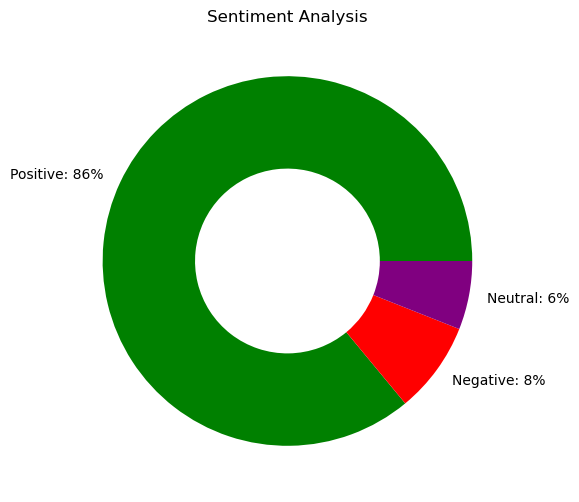

In [266]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define data
pos = 86
neg = 8
neu = 6
labels = ['Positive', 'Negative', 'Neutral']
values = [pos, neg, neu]


# Create labels with values
label_values = [f'{label}: {value}%' for label, value in zip(labels, values)]
 
# Create donut chart
fig, ax = plt.subplots(figsize=(6, 6))
ax.pie(values, labels=label_values, wedgeprops=dict(width=0.5), colors=['green', 'red', 'purple'])
ax.set_title('Sentiment Analysis')

plt.show()

In [162]:
from textblob import TextBlob
from textblob.sentiments import NaiveBayesAnalyzer

for business in response['businesses']:
    print('Business Name:', business['name'])
    print('Rating:', business['rating'])
    print('Review Count:', business['review_count'])
    print('Reviews:')

    BUS_REVIEW = f"/v3/businesses/{business['id']}/reviews"

    try:
        reviews = request(API_HOST, BUS_REVIEW, API_KEY)
        for review in reviews.get('reviews', []):
            print(' -', review['text'])

            # Sentiment analysis
            blob = TextBlob(review['text'], analyzer=NaiveBayesAnalyzer())
            sentiment = blob.sentiment

            if sentiment.classification == 'pos':
                print('    Sentiment: Positive')
            else:
                print('    Sentiment: Negative')
    except Exception as e:
        print(f"Error retrieving or analyzing reviews: {e}")

    print('\n================\n\n')

Business Name: Wild West City
Rating: 4.2
Review Count: 96
Reviews:
Querying https://api.yelp.com/v3/businesses/pc7ISyyi6NAg15XI8PzTKQ/reviews ...
 - A very fun place! Lots of shows, little museum shops and sweets, a fun train and cart ride and petting zoo. The pigs in the petting zoo are either really...
    Sentiment: Positive
 - A fun time in the Old West. It's a place where things haven't changed since it opened in the 1950's, and that's the charm that has brought us back. Constant...
    Sentiment: Positive
 - The greatest place to visit in the summer and fall. The shows are excellent. Plus, they have great food in the saloon!
    Sentiment: Positive



Business Name: The Castle Fun Center
Rating: 3.8
Review Count: 96
Reviews:
Querying https://api.yelp.com/v3/businesses/fIg9KDL2AuJVgTBSbbqpww/reviews ...
 - Love the setup of this place - each type of activity has its once space so the kids won't be able to easily wander off. The whole center is clean enough, so...
    Sentiment: P

In [183]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\pmush\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [185]:
from nltk.corpus import stopwords

In [191]:
blob = TextBlob(review['text'])
blob

TextBlob("We booked 4 people for The Grand Parlor. The venue was clearly short staffed. Our game started late, we received repetitive and unhelpful clues as well as...")

In [193]:
stops = stopwords.words('english')
stops

['a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 'her',
 'here',
 'hers',
 'herself',
 "he's",
 'him',
 'himself',
 'his',
 'how',
 'i',
 "i'd",
 'if',
 "i'll",
 "i'm",
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it'd",
 "it'll",
 "it's",
 'its',
 'itself',
 "i've",
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'on

In [205]:
all_reviews = []

for business in response['businesses']:
    BUS_REVIEW = f"/v3/businesses/{business['id']}/reviews"
    reviews = request(API_HOST, BUS_REVIEW, API_KEY)
    for review in reviews['reviews']:
        all_reviews.append(review['text'])

full_text = ' '.join(all_reviews)

Querying https://api.yelp.com/v3/businesses/pc7ISyyi6NAg15XI8PzTKQ/reviews ...
Querying https://api.yelp.com/v3/businesses/fIg9KDL2AuJVgTBSbbqpww/reviews ...
Querying https://api.yelp.com/v3/businesses/vgtgz0PasvOQyST_-aucmw/reviews ...
Querying https://api.yelp.com/v3/businesses/Rsdeyiu8QIlKdRcUM-5oig/reviews ...
Querying https://api.yelp.com/v3/businesses/IcDr0E8csYJBaZFr03BlOQ/reviews ...
Querying https://api.yelp.com/v3/businesses/cAiyEXdDFc4MpozEX4eCHw/reviews ...
Querying https://api.yelp.com/v3/businesses/R1gN0M83ozpz9_i-pXRMXg/reviews ...
Querying https://api.yelp.com/v3/businesses/v_vF3YLJET6eGJP59Sfucg/reviews ...
Querying https://api.yelp.com/v3/businesses/h2U41yTfdFkprsSk4tYbqw/reviews ...
Querying https://api.yelp.com/v3/businesses/Wsg8XzCAb7HTqSgHWvd_-w/reviews ...
Querying https://api.yelp.com/v3/businesses/Ri0ZUhF5_rW02w44iI91_Q/reviews ...
Querying https://api.yelp.com/v3/businesses/guUc5rNuJoW85dMFKPmFNw/reviews ...
Querying https://api.yelp.com/v3/businesses/XQzgTN6v

In [207]:
blob = TextBlob(full_text)

# Get word counts as (word, count) pairs
items = blob.word_counts.items()
items

dict_items([('a', 105), ('very', 13), ('fun', 27), ('place', 25), ('lots', 5), ('of', 52), ('shows', 4), ('little', 4), ('museum', 4), ('shops', 1), ('and', 121), ('sweets', 1), ('train', 1), ('cart', 1), ('ride', 5), ('petting', 2), ('zoo', 4), ('the', 176), ('pigs', 1), ('in', 47), ('are', 29), ('either', 1), ('really', 4), ('time', 15), ('old', 6), ('west', 2), ('it', 64), ('s', 43), ('where', 5), ('things', 2), ('have', 15), ("n't", 20), ('changed', 2), ('since', 5), ('opened', 1), ('1950', 1), ('that', 23), ('charm', 1), ('has', 10), ('brought', 3), ('us', 2), ('back', 6), ('constant', 1), ('greatest', 1), ('to', 66), ('visit', 3), ('summer', 3), ('fall', 1), ('excellent', 1), ('plus', 2), ('they', 23), ('great', 18), ('food', 9), ('saloon', 1), ('love', 11), ('setup', 1), ('this', 32), ('each', 2), ('type', 1), ('activity', 1), ('its', 5), ('once', 5), ('space', 3), ('so', 23), ('kids', 18), ('wo', 1), ('be', 8), ('able', 2), ('easily', 1), ('wander', 1), ('off', 2), ('whole', 3)

In [209]:
items = [item for item in items if item[0] not in stop_words]
len(items)

891

In [211]:
items

[('fun', 27),
 ('place', 25),
 ('lots', 5),
 ('shows', 4),
 ('little', 4),
 ('museum', 4),
 ('shops', 1),
 ('sweets', 1),
 ('train', 1),
 ('cart', 1),
 ('ride', 5),
 ('petting', 2),
 ('zoo', 4),
 ('pigs', 1),
 ('either', 1),
 ('really', 4),
 ('time', 15),
 ('old', 6),
 ('west', 2),
 ('things', 2),
 ("n't", 20),
 ('changed', 2),
 ('since', 5),
 ('opened', 1),
 ('1950', 1),
 ('charm', 1),
 ('brought', 3),
 ('us', 2),
 ('back', 6),
 ('constant', 1),
 ('greatest', 1),
 ('visit', 3),
 ('summer', 3),
 ('fall', 1),
 ('excellent', 1),
 ('plus', 2),
 ('great', 18),
 ('food', 9),
 ('saloon', 1),
 ('love', 11),
 ('setup', 1),
 ('type', 1),
 ('activity', 1),
 ('space', 3),
 ('kids', 18),
 ('wo', 1),
 ('able', 2),
 ('easily', 1),
 ('wander', 1),
 ('whole', 3),
 ('center', 3),
 ('clean', 6),
 ('enough', 1),
 ('much', 3),
 ('family', 17),
 ('new', 4),
 ('bar', 2),
 ('gorgeous', 1),
 ('bowling', 3),
 ('rink', 3),
 ('well', 3),
 ('disappointment', 1),
 ('knowing', 1),
 ('earlier', 1),
 ('mini', 5),
 ('

In [213]:
from operator import itemgetter

In [215]:
sorted_items = sorted(items, key=itemgetter(1), reverse=True)

In [217]:
top_20 = sorted_items[0:21]
top_20

[('fun', 27),
 ('place', 25),
 ("n't", 20),
 ('park', 19),
 ('great', 18),
 ('kids', 18),
 ('family', 17),
 ('time', 15),
 ('good', 15),
 ('staff', 14),
 ('rides', 12),
 ('love', 11),
 ('food', 9),
 ('go', 9),
 ('get', 9),
 ('went', 9),
 ('night', 9),
 ('lot', 9),
 ('year', 9),
 ('golf', 8),
 ('birthday', 8)]

## Word Frequencies & Visualization

In [219]:
import pandas as pd
import matplotlib.pyplot as plt


In [221]:
df = pd.DataFrame(top_20, columns=['word','count'])
df

,word,count
0,fun,27
1,place,25
2,n't,20
3,park,19
4,great,18
5,kids,18
6,family,17
7,time,15
8,good,15
9,staff,14


In [223]:
# drop item 3 since it is not a word
df = df.drop(df.index[2])
df

,word,count
0,fun,27
1,place,25
3,park,19
4,great,18
5,kids,18
6,family,17
7,time,15
8,good,15
9,staff,14
10,rides,12


In [226]:
from wordcloud import WordCloud

In [228]:
wordcloud = WordCloud(colormap='prism',background_color='white', max_words=50)

In [236]:
wordcloud = WordCloud(width=800, height=400).generate_from_frequencies(dict(top_20))

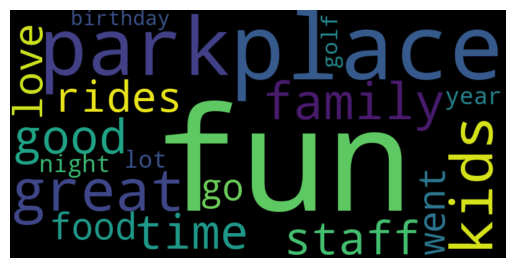

In [262]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

# Define and extend stopwords
stopwords = set(STOPWORDS)
stopwords.update(["d", "I'll", "'tis'", "n't"])

# Filter top_20 manually
filtered = [(word, freq) for word, freq in top_20 if word not in stopwords]

# Create WordCloud from filtered frequencies
wordcloud = WordCloud(width=800, height=400, background_color='black')
wordcloud = wordcloud.generate_from_frequencies(dict(filtered))

# Display
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [292]:
df1.head

<bound method NDFrame.head of                 business_id                          business_name  rating  \
0    pc7ISyyi6NAg15XI8PzTKQ                         Wild West City     4.2   
1    pc7ISyyi6NAg15XI8PzTKQ                         Wild West City     4.2   
2    pc7ISyyi6NAg15XI8PzTKQ                         Wild West City     4.2   
3    fIg9KDL2AuJVgTBSbbqpww                  The Castle Fun Center     3.8   
4    fIg9KDL2AuJVgTBSbbqpww                  The Castle Fun Center     3.8   
..                      ...                                    ...     ...   
115  qhdF6Chbgf49ZvLU-Wlnig                          The Golf Zone     2.7   
116  qhdF6Chbgf49ZvLU-Wlnig                          The Golf Zone     2.7   
117  lzz2po84i6rMHrLl9Omwaw  13th Hour Haunted House & Escape Room     4.5   
118  lzz2po84i6rMHrLl9Omwaw  13th Hour Haunted House & Escape Room     4.5   
119  lzz2po84i6rMHrLl9Omwaw  13th Hour Haunted House & Escape Room     4.5   

     review_count                

In [294]:
# Assuming df has 'business_id', 'sentiment', and 'rating' columns for multiple businesses

# Group by business and calculate the proportion of sentiments
sentiment_counts = df1.groupby('business_name')['sentiment'].value_counts(normalize=True).unstack(fill_value=0)

# Merge sentiment proportions with business ratings
business_ratings = df1.groupby('business_name')['rating'].first()  # Or take average, etc.

# Combine sentiment proportions with business ratings
sentiment_data = sentiment_counts.join(business_ratings)

# Check the first few rows to ensure proper structure
print(sentiment_data.head())

                                               Negative  Neutral  Positive  \
business_name                                                                
13th Hour Haunted House & Escape Room          0.333333      0.0  0.666667   
Adventurer's Park Family Entertainment Center  0.333333      0.0  0.666667   
American Dream                                 0.000000      0.0  1.000000   
Brighton Asylum                                0.000000      0.0  1.000000   
Camelbeach                                     0.333333      0.0  0.666667   

                                               rating  
business_name                                          
13th Hour Haunted House & Escape Room             4.5  
Adventurer's Park Family Entertainment Center     3.4  
American Dream                                    3.5  
Brighton Asylum                                   3.7  
Camelbeach                                        3.5  


In [302]:
#Step 1: Group by business and calculate sentiment proportions
sentiment_props = df1.groupby('business_name')['sentiment'].value_counts(normalize=True).unstack(fill_value=0)

# Step 2: Get ratings per business
ratings = df1.groupby('business_name')['rating'].first()

# Step 3: Combine into one DataFrame
df1 = sentiment_props.merge(ratings, left_index=True, right_index=True)

# Step 4: Now calculate correlation
correlation = df1[['Positive', 'Negative', 'Neutral', 'rating']].corr()

# Step 5: Display correlation matrix
print(correlation)

          Positive  Negative   Neutral    rating
Positive  1.000000 -0.798132 -0.526472  0.416633
Negative -0.798132  1.000000 -0.092031 -0.319628
Neutral  -0.526472 -0.092031  1.000000 -0.237549
rating    0.416633 -0.319628 -0.237549  1.000000


In [306]:
df_sorted = df1.sort_values(by='rating', ascending=False)
df_sorted

,Negative,Neutral,Positive,rating
business_name,,,,
Universal Studios,0.000000,0.333333,0.666667,4.8
Talon,0.000000,0.000000,1.000000,4.8
Xtreme Energy,0.000000,0.000000,1.000000,4.7
13th Hour Haunted House & Escape Room,0.333333,0.000000,0.666667,4.5
Easton Garlic Festival,0.000000,0.000000,1.000000,4.4
Hotel of Horror,0.000000,0.000000,1.000000,4.4
Coca-Cola Park,0.000000,0.000000,1.000000,4.3
Pier 25,0.000000,0.000000,1.000000,4.3
Lumino City Holiday Lights Festival,0.000000,0.000000,1.000000,4.3


In [308]:
top_5 = df_sorted[:5]
print(top_5)

                                       Negative   Neutral  Positive  rating
business_name                                                              
Universal Studios                      0.000000  0.333333  0.666667     4.8
Talon                                  0.000000  0.000000  1.000000     4.8
Xtreme Energy                          0.000000  0.000000  1.000000     4.7
13th Hour Haunted House & Escape Room  0.333333  0.000000  0.666667     4.5
Easton Garlic Festival                 0.000000  0.000000  1.000000     4.4


## Conclusion
* ### Textblob (86%) and NaiveBayesAnalyzer (77%) both indicate positive sentiments
* ### Some of the sentiments rated negative are not negative but might have a negative word like 'not' or 'wrong'
* ### NaiveBayesAnalyzer tends to process much slower than Textblob
* ### More reviews per business are required to give a better correlation
* ### Universal Studios, Talon, Xtreme Energy, 13th Hour Haunted House & Escape Room and Easton Garlic Festival are the 5 highly rated theme parks.
* ### Wordcloud reveals some aspects that reviewers value for instance family and kids, fun, rides at a business, the food and the customer service from the staff.  